# Test OSMnx

In [1]:
import osmnx as ox
ox.config(use_cache=True, log_console=True)

# Get the driveable street network for Manhattan
place_name = "Manhattan, New York City, New York, USA"
graph = ox.graph_from_place(place_name, network_type='walk', simplify=False)


/var/folders/ly/rt519r9j7sx5syy44_l85hz80000gn/T/ipykernel_2545/4037003471.py:2: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


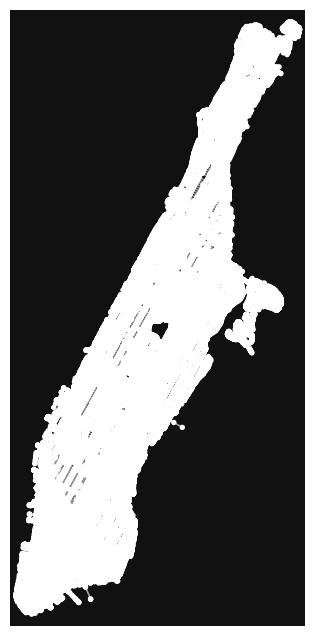

In [5]:
# Plot the street network
fig, ax = ox.plot_graph(graph)

In [4]:
import matplotlib.pyplot as plt
# Save the figure as an SVG file
plt.savefig("graph.svg", format="svg")

<Figure size 640x480 with 0 Axes>

In [3]:
nodes, edges = ox.graph_to_gdfs(graph)


In [8]:
print(edges)

                                 osmid    highway  oneway  reversed  length  \
u           v          key                                                    
30807307    4276626653 0      46613689  bridleway   False     False  11.984   
            4276627019 0      46613689  bridleway   False      True  12.302   
30807308    4276626644 0     332080802    footway   False     False   5.349   
            1203806398 0     428576367    footway   False     False   5.894   
30807309    30807310   0      46613689  bridleway   False     False  17.034   
...                                ...        ...     ...       ...     ...   
10964555776 42452495   0    1180567732    primary   False     False   0.320   
10971891908 1760596335 0    1181459947    footway   False     False  21.645   
            1760600371 0    1181459947    footway   False      True  20.468   
10972281720 9561344667 0    1038090175    footway   False     False   1.865   
            6882378481 0    1038090175    footway   